In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('turnover.csv', encoding='latin1')

# Data Cleaning
# Remove duplicates
cleaned_data = data.drop_duplicates()

# Ensure numerical columns are correctly typed
numerical_columns = ['stag', 'age', 'extraversion', 'independ', 'selfcontrol', 'anxiety', 'novator']
for col in numerical_columns:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

# Drop rows with missing values in key columns
cleaned_data = cleaned_data.dropna(subset=numerical_columns)








In [2]:
data

,stag,event,gender,age,industry,profession,traffic,coach,head_gender,greywage,way,extraversion,independ,selfcontrol,anxiety,novator
0,7.030801,1,m,35.0,Banks,HR,rabrecNErab,no,f,white,bus,6.2,4.1,5.7,7.1,8.3
1,22.965092,1,m,33.0,Banks,HR,empjs,no,m,white,bus,6.2,4.1,5.7,7.1,8.3
2,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,6.2,6.2,2.6,4.8,8.3
3,15.934292,1,f,35.0,PowerGeneration,HR,rabrecNErab,no,m,white,bus,5.4,7.6,4.9,2.5,6.7
4,8.410678,1,m,32.0,Retail,Commercial,youjs,yes,f,white,bus,3.0,4.1,8.0,7.1,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1125,10.611910,0,f,41.0,Banks,HR,rabrecNErab,my head,m,white,bus,8.6,3.4,2.6,4.8,8.3
1126,118.800821,0,f,34.0,Telecom,Accounting,KA,no,f,white,bus,4.6,5.5,7.2,6.3,3.7
1127,49.412731,0,f,51.0,Consult,HR,empjs,no,m,grey,bus,3.8,7.6,5.7,6.3,5.2


In [3]:
# Summary Statistics
summary_stats = cleaned_data[numerical_columns].describe()
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
              stag          age  extraversion     independ  selfcontrol  \
count  1116.000000  1116.000000   1116.000000  1116.000000  1116.000000   
mean     36.701802    31.024734      5.589606     5.474462     5.607527   
std      34.173048     6.973078      1.857401     1.702149     1.985720   
min       0.394251    18.000000      1.000000     1.000000     1.000000   
25%      11.720739    26.000000      4.600000     4.100000     4.100000   
50%      24.443532    30.000000      5.400000     5.500000     5.700000   
75%      51.622177    36.000000      7.000000     6.900000     7.200000   
max     179.449692    58.000000     10.000000    10.000000    10.000000   

           anxiety      novator  
count  1116.000000  1116.000000  
mean      5.666667     5.877330  
std       1.711035     1.903534  
min       1.700000     1.000000  
25%       4.800000     4.400000  
50%       5.600000     6.000000  
75%       7.100000     7.500000  
max      10.000000    10.000000 

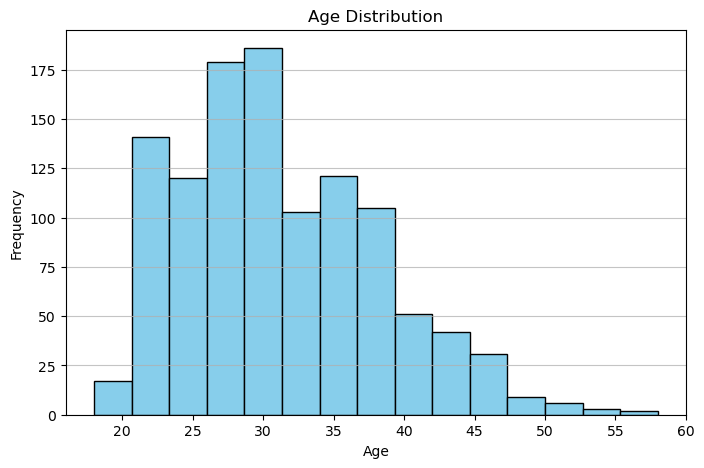

In [4]:
# Visualization 1: Histogram of 'age'
plt.figure(figsize=(8, 5))
plt.hist(cleaned_data['age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.savefig('age_distribution.png')
plt.show()


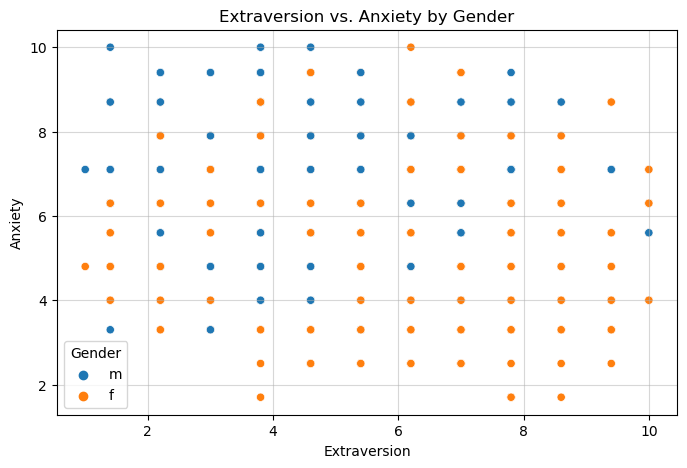

In [5]:
# Visualization 2: Scatter Plot of 'extraversion' vs. 'anxiety'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='extraversion', y='anxiety', hue='gender', data=cleaned_data)
plt.title('Extraversion vs. Anxiety by Gender')
plt.xlabel('Extraversion')
plt.ylabel('Anxiety')
plt.legend(title='Gender')
plt.grid(alpha=0.5)
plt.savefig('extraversion_anxiety_scatter.png')
plt.show()

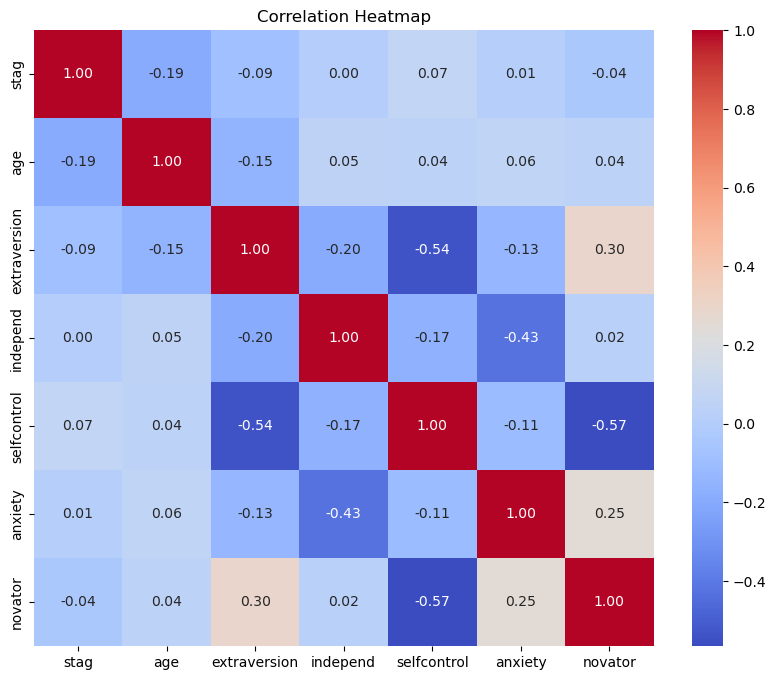

In [6]:
# Visualization 3: Heatmap of Correlations Among Numerical Variables
plt.figure(figsize=(10, 8))
corr_matrix = cleaned_data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()


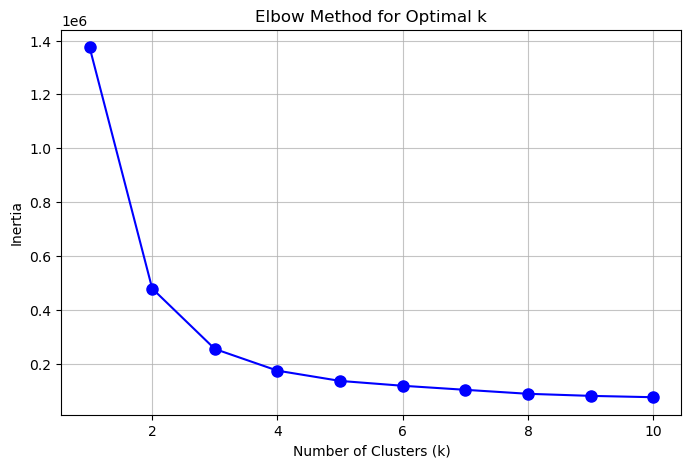

In [7]:

# Advanced Visualization: Elbow Plot for Clustering
from sklearn.cluster import KMeans

# Prepare data for clustering
X = cleaned_data[numerical_columns]
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(alpha=0.75)
plt.savefig('elbow_plot.png')
plt.show()




